<a href="https://colab.research.google.com/github/techakhil272/AI/blob/main/neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Text Recognition**

**Neural Networks**

Importing Libraries...

In [ ]:
try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass

# import numpy as np
# from tensorflow import keras
# import tensorflow as tf
# from keras import Sequential
# from keras.layers import Dense

Training Model and Prediction

# **Handwritten Text Recognition**

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt


Model Creation and output prediction.

In [ ]:
#Load Mnist data set to compare
mnist=tf.keras.datasets.mnist
#loading training and testing value using mnist.load_Data()
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#Normalizing the data to understand by humans
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

# y_train = tf.keras.utils.normalize(y_train,axis=1)
# y_test = tf.keras.utils.normalize(y_test,axis=1)

model = tf.keras.models.Sequential()
#input Layer
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#Hidden Layer
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
#OutPut Layer
model.add(tf.keras.layers.Dense(128,activation='softmax'))

#creating the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)
#creating model file could be used again without same values
model.save('handwritten.model')

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3275 - accuracy: 0.9085
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1221 - accuracy: 0.9623
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0823 - accuracy: 0.9743


In [ ]:
# mnist=tf.keras.datasets.mnist
# (x_train,y_train),(x_test,y_test)=mnist.load_data()

# x_train = tf.keras.utils.normalize(x_train,axis=1)
# x_test = tf.keras.utils.normalize(x_test,axis=1)
# y_train = tf.keras.utils.normalize(y_train,axis=1)
# y_test = tf.keras.utils.normalize(y_test,axis=1)

# model = tf.keras.models.load_model('handwritten.model')

# loss, accuracy = model.evaluate(x_test, y_test,epoch=10)

# print(loss)
# print(accuracy)

In [ ]:
import tensorflow as tf

TO Get the model from saved File

In [ ]:
model = tf.keras.models.load_model('handwritten.model')

Evaluate the and accuracy.

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0990 - accuracy: 0.9714
0.09896272420883179
0.9714000225067139


Image Used to scan is

This Digit is probably a 2


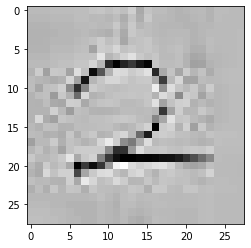

In [ ]:
img = cv2.imread(f"unit2.jpeg")[:,:,0] #Reading img data and storing into img variable
img = np.invert(np.array([img])) #Creating array inverted like straight line
prediction = model.predict(img) #Prediction
print(f"This Digit is probably a {np.argmax(prediction)}") #Getting output with max prediction value
plt.imshow(img[0],cmap=plt.cm.binary) #Showing Image
plt.show()